In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using BAT

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements

In [3]:
images = load("../data/experiment/m2/simulated_events.jld2")["array"];
conv_mat = load("../data/experiment/m2/conv_matrix-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_3"],
)

event = images[1];

In [4]:
include("../src/likelihood.jl")
include("../src/utill.jl")

corner_plots (generic function with 1 method)

In [5]:
param_truth = (
        tr_size = [0.15, 0.15],
        ang_spr = [4.0, 4.0],
        s_waist = [2.9,],
        μ_x = [46,50,20,115], # alignment X
        μ_y = [48,50,25,160], # alignment Y
        σ_x = [1,3,6,10], # resolution X
        σ_y = [1,3,6,10], # resolution Y
        δ_x = [0.0271,0.0216,0.114,0.0303], # pixel size X
        δ_y = [0.0305,0.0234,0.125,0.0298], # pixel size Y
        int_coeff  = [34896.560, 50315.113, 10317.860, 310986.998], # light intensity coefficient
        s_cam = [0.0, 1.478, 15.026, 23.1150], # camera position
    );


In [21]:
log_likelihood = let e = event, c = conv_matrices
    
    params -> begin
        
        ll = zero(Float64)
        ll += cam_likelihood(params, e.cam_1, e.population, c.cam_1, 1)
        ll += cam_likelihood(params, e.cam_2, e.population, c.cam_2, 2)
        ll += cam_likelihood(params, e.cam_3, e.population, c.cam_3, 3)
        ll += cam_likelihood(params, e.cam_4, e.population, c.cam_4, 4)
    
        return LogDVal(ll)
        
    end
end

#16 (generic function with 1 method)

In [22]:
β_min = 0.7
β_max = 1.3

prior = NamedTupleDist(
        tr_size = [β_min*param_truth.tr_size[1]..β_max*param_truth.tr_size[1], β_min*param_truth.tr_size[2]..β_max*param_truth.tr_size[2]],
        ang_spr = [β_min*param_truth.ang_spr[1]..β_max*param_truth.ang_spr[1], β_min*param_truth.ang_spr[2]..β_max*param_truth.ang_spr[2]],
        s_waist = [β_min*param_truth.s_waist[1]..β_max*param_truth.s_waist[1],],
        μ_x = [46,50,20,115], 
        μ_y = [48,50,25,160], 
        σ_x = [1,3,6,10], 
        σ_y = [1,3,6,10], 
        δ_x = [0.0271,0.0216,0.114,0.0303], 
        δ_y = [0.0305,0.0234,0.125,0.0298], 
        int_coeff  = [34896.560, 50315.113, 10317.860, 310986.998], 
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );

In [23]:
# β_min = 0.8
# β_max = 1.2

# prior = NamedTupleDist(
#         tr_size = [β_min*param_truth.tr_size[1]..β_max*param_truth.tr_size[1], β_min*param_truth.tr_size[2]..β_max*param_truth.tr_size[2]],
#         ang_spr = [β_min*param_truth.ang_spr[1]..β_max*param_truth.ang_spr[1], β_min*param_truth.ang_spr[2]..β_max*param_truth.ang_spr[2]],
#         s_waist = [β_min*param_truth.s_waist[1]..β_max*param_truth.s_waist[1],],
#         μ_x = [ β_min*param_truth.μ_x[1]..β_max*param_truth.μ_x[1],
#                 β_min*param_truth.μ_x[2]..β_max*param_truth.μ_x[2],
#                 β_min*param_truth.μ_x[3]..β_max*param_truth.μ_x[3]], 
#         μ_y = [ β_min*param_truth.μ_y[1]..β_max*param_truth.μ_y[1],
#                 β_min*param_truth.μ_y[2]..β_max*param_truth.μ_y[2],
#                 β_min*param_truth.μ_y[3]..β_max*param_truth.μ_y[3]], 
#         σ_x = [1,3,6,10], 
#         σ_y = [1,3,6,10], 
#         δ_x = [0.0271,0.0216,0.114,0.0303], 
#         δ_y = [0.0305,0.0234,0.125,0.0298], 
#         int_coeff  = [34896.560, 50315.113, 10317.860, 310986.998], 
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     );

In [24]:
# β_min = 0.7
# β_max = 1.3

# prior = NamedTupleDist(
#         tr_size = [β_min*param_truth.tr_size[1]..β_max*param_truth.tr_size[1], β_min*param_truth.tr_size[2]..β_max*param_truth.tr_size[2]],
    
#         ang_spr = [β_min*param_truth.ang_spr[1]..β_max*param_truth.ang_spr[1], β_min*param_truth.ang_spr[2]..β_max*param_truth.ang_spr[2]],
    
#         s_waist = [β_min*param_truth.s_waist[1]..β_max*param_truth.s_waist[1],],
    
#         μ_x = [ β_min*param_truth.μ_x[1]..β_max*param_truth.μ_x[1],
#                 β_min*param_truth.μ_x[2]..β_max*param_truth.μ_x[2],
#                 β_min*param_truth.μ_x[3]..β_max*param_truth.μ_x[3],
#                 β_min*param_truth.μ_x[4]..β_max*param_truth.μ_x[4]], 
    
#         μ_y = [ β_min*param_truth.μ_y[1]..β_max*param_truth.μ_y[1],
#                 β_min*param_truth.μ_y[2]..β_max*param_truth.μ_y[2],
#                 β_min*param_truth.μ_y[3]..β_max*param_truth.μ_y[3],
#                 β_min*param_truth.μ_y[4]..β_max*param_truth.μ_y[4]],
    
#         σ_x = [ β_min*param_truth.σ_x[1]..β_max*param_truth.σ_x[1],
#                 β_min*param_truth.σ_x[2]..β_max*param_truth.σ_x[2],
#                 β_min*param_truth.σ_x[3]..β_max*param_truth.σ_x[3],
#                 β_min*param_truth.σ_x[4]..β_max*param_truth.σ_x[4]],
    
#         σ_y = [ β_min*param_truth.σ_y[1]..β_max*param_truth.σ_y[1],
#                 β_min*param_truth.σ_y[2]..β_max*param_truth.σ_y[2],
#                 β_min*param_truth.σ_y[3]..β_max*param_truth.σ_y[3],
#                 β_min*param_truth.σ_y[4]..β_max*param_truth.σ_y[4]],
    
#         δ_x = [ β_min*param_truth.δ_x[1]..β_max*param_truth.δ_x[1],
#                 β_min*param_truth.δ_x[2]..β_max*param_truth.δ_x[2],
#                 β_min*param_truth.δ_x[3]..β_max*param_truth.δ_x[3],
#                 β_min*param_truth.δ_x[4]..β_max*param_truth.δ_x[4]],
    
#         δ_y = [ β_min*param_truth.δ_y[1]..β_max*param_truth.δ_y[1],
#                 β_min*param_truth.δ_y[2]..β_max*param_truth.δ_y[2],
#                 β_min*param_truth.δ_y[3]..β_max*param_truth.δ_y[3],
#                 β_min*param_truth.δ_y[4]..β_max*param_truth.δ_y[4]],
    
#         int_coeff  = [ β_min*param_truth.int_coeff[1]..β_max*param_truth.int_coeff[1],
#                 β_min*param_truth.int_coeff[2]..β_max*param_truth.int_coeff[2],
#                 β_min*param_truth.int_coeff[3]..β_max*param_truth.int_coeff[3],
#                 β_min*param_truth.int_coeff[4]..β_max*param_truth.int_coeff[4]], 
    
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     );

In [25]:
posterior = PosteriorDensity(log_likelihood, prior);

In [26]:
tuning = AdaptiveMetropolisTuning(
    λ = 0.5,
    α = 0.15..0.25,
    β = 1.5,
    c = 1e-4..1e2
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCInitStrategy(
    init_tries_per_chain = 8..128,
    max_nsamples_init = 25,
    max_nsteps_init = 250,
    max_time_init = Inf
)

burnin = MCMCBurninStrategy(
    max_nsamples_per_cycle = 400,
    max_nsteps_per_cycle = 400,
    max_time_per_cycle = 10,
    max_ncycles = 30
);

algorithm = MetropolisHastings()

MetropolisHastings(BAT.MvTDistProposal(1.0), RepetitionWeighting{Int64}())


In [27]:
nsamples = 2*10^4
nchains = 4;

In [28]:
@time samples = bat_sample(
    posterior, (nsamples, nchains), algorithm,
    max_nsteps = nsamples,
    max_time = Inf,
    tuning = tuning,
    init = init,
    burnin = burnin,
    convergence = convergence,
    strict = false,
    filter = true
).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ I

775.049460 seconds (26.71 M allocations: 192.520 GiB, 3.24% gc time)


In [29]:
length(samples)

18746

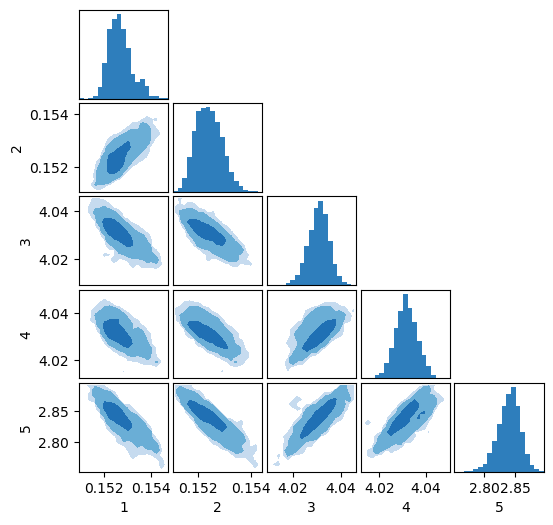

In [30]:
dims = [1,2,3,4,5,]
names = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
levels = [ 0.4, 0.7, 0.8, 0.95, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [14]:
bat_eff_sample_size(unshaped.(samples.v)).result

5-element Array{Float64,1}:
 1345.0129782030758
 1504.144012037229
 1466.8646860707825
 1374.883302888082
 1457.518506837024

In [15]:
mode(samples)[1]

(tr_size = [0.15346375613086297, 0.15266119717959617], ang_spr = [4.081467333341355, 4.115655098705353], s_waist = [2.774425904740598], μ_x = [46, 50, 20, 115], μ_y = [48, 50, 25, 160], σ_x = [1, 3, 6, 10], σ_y = [1, 3, 6, 10], δ_x = [0.0271, 0.0216, 0.114, 0.0303], δ_y = [0.0305, 0.0234, 0.125, 0.0298], int_coeff = [34896.56, 50315.113, 10317.86, 310986.998], s_cam = [0.0, 1.478, 15.026, 23.115])

In [16]:
std(samples)[1]

(tr_size = [0.0006431464095209087, 0.0005277259260257816], ang_spr = [0.04125111690488575, 0.04395322153045931], s_waist = [0.03844969452427057], μ_x = [0, 0, 0, 0], μ_y = [0, 0, 0, 0], σ_x = [0, 0, 0, 0], σ_y = [0, 0, 0, 0], δ_x = [0.0, 0.0, 0.0, 0.0], δ_y = [0.0, 0.0, 0.0, 0.0], int_coeff = [0.0, 0.0, 0.0, 0.0], s_cam = [0.0, 0.0, 0.0, 0.0])

In [ ]:
# 1) Decorelate parameters `